In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('auto_insurance_claim.csv')

In [3]:
df.head(10)

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,02-03-2011,Employed,...,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize
5,OC83172,US,IA,Iowa,825.629780,Yes,Basic,Bachelor,1/25/11,Employed,...,94,0,2,Personal Auto,Personal L3,Hail,Web,159.383042,Two-Door Car,Medsize
6,XZ87318,US,IA,Iowa,538.089864,Yes,Basic,College,2/24/11,Employed,...,13,0,9,Corporate Auto,Corporate L3,Collision,Agent,321.600000,Four-Door Car,Medsize
7,CF85061,US,NE,Nebraska,721.610031,No,Premium,Master,1/18/11,Unemployed,...,68,0,4,Corporate Auto,Corporate L3,Collision,Agent,363.029680,Four-Door Car,Medsize
8,DY87989,US,IA,Iowa,2412.750402,Yes,Basic,Bachelor,1/26/11,Medical Leave,...,3,0,2,Corporate Auto,Corporate L3,Collision,Agent,511.200000,Four-Door Car,Medsize
9,BQ94931,US,IA,Iowa,738.817808,No,Extended,College,2/17/11,Employed,...,7,0,8,Special Auto,Special L2,Hail,Branch,425.527834,Four-Door Car,Medsize


In [4]:
df.shape

(9134, 26)

In [5]:
#lets delete the columns which are not relevant for the training of the model
df.drop(['Customer','Country','State Code','State','Education','Effective To Date','Policy Type','Policy','Claim Reason','Sales Channel','Vehicle Class','Vehicle Size'],axis=1,inplace=True)

In [6]:
df.head(10)

,Claim Amount,Response,Coverage,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,276.351928,No,Basic,Employed,F,56274,Suburban,Married,69,32,5,0,1,384.811147
1,697.953590,No,Extended,Unemployed,F,0,Suburban,Single,94,13,42,0,8,1131.464935
2,1288.743165,No,Premium,Employed,F,48767,Suburban,Married,108,18,38,0,2,566.472247
3,764.586183,No,Basic,Unemployed,M,0,Suburban,Married,106,18,65,0,7,529.881344
4,281.369258,No,Basic,Employed,M,43836,Rural,Single,73,12,44,0,1,138.130879
5,825.629780,Yes,Basic,Employed,F,62902,Rural,Married,69,14,94,0,2,159.383042
6,538.089864,Yes,Basic,Employed,F,55350,Suburban,Married,67,0,13,0,9,321.600000
7,721.610031,No,Premium,Unemployed,M,0,Urban,Single,101,0,68,0,4,363.029680
8,2412.750402,Yes,Basic,Medical Leave,M,14072,Suburban,Divorced,71,13,3,0,2,511.200000
9,738.817808,No,Extended,Employed,F,28812,Urban,Married,93,17,7,0,8,425.527834


In [7]:
#Lets check some value counts so we can convert these columns into numerical numbers
df['Coverage'].value_counts()

Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64

In [8]:
df['EmploymentStatus'].value_counts()

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: EmploymentStatus, dtype: int64

In [9]:
df['Location Code'].value_counts()

Suburban    5779
Rural       1773
Urban       1582
Name: Location Code, dtype: int64

In [10]:
df['Marital Status'].value_counts()

Married     5298
Single      2467
Divorced    1369
Name: Marital Status, dtype: int64

In [11]:
#as the Employment Status also dont show any importance
df.drop(['EmploymentStatus'],axis=1,inplace=True)

In [12]:
df.head(10)

,Claim Amount,Response,Coverage,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,276.351928,No,Basic,F,56274,Suburban,Married,69,32,5,0,1,384.811147
1,697.953590,No,Extended,F,0,Suburban,Single,94,13,42,0,8,1131.464935
2,1288.743165,No,Premium,F,48767,Suburban,Married,108,18,38,0,2,566.472247
3,764.586183,No,Basic,M,0,Suburban,Married,106,18,65,0,7,529.881344
4,281.369258,No,Basic,M,43836,Rural,Single,73,12,44,0,1,138.130879
5,825.629780,Yes,Basic,F,62902,Rural,Married,69,14,94,0,2,159.383042
6,538.089864,Yes,Basic,F,55350,Suburban,Married,67,0,13,0,9,321.600000
7,721.610031,No,Premium,M,0,Urban,Single,101,0,68,0,4,363.029680
8,2412.750402,Yes,Basic,M,14072,Suburban,Divorced,71,13,3,0,2,511.200000
9,738.817808,No,Extended,F,28812,Urban,Married,93,17,7,0,8,425.527834


In [13]:
#Lets convert Coverage column
coverage = pd.get_dummies(df['Coverage'],drop_first=True)

In [14]:
gender = pd.get_dummies(df['Gender'],drop_first=True)

In [15]:
marital_status = pd.get_dummies(df['Marital Status'],drop_first=True)

In [16]:
location_code = pd.get_dummies(df['Location Code'],drop_first=True)

In [17]:
response = pd.get_dummies(df['Response'],drop_first=True)

In [18]:
df.drop(['Coverage','Gender','Marital Status','Location Code'],inplace=True,axis=1)

In [19]:
df.head(10)

,Claim Amount,Response,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,276.351928,No,56274,69,32,5,0,1,384.811147
1,697.953590,No,0,94,13,42,0,8,1131.464935
2,1288.743165,No,48767,108,18,38,0,2,566.472247
3,764.586183,No,0,106,18,65,0,7,529.881344
4,281.369258,No,43836,73,12,44,0,1,138.130879
5,825.629780,Yes,62902,69,14,94,0,2,159.383042
6,538.089864,Yes,55350,67,0,13,0,9,321.600000
7,721.610031,No,0,101,0,68,0,4,363.029680
8,2412.750402,Yes,14072,71,13,3,0,2,511.200000
9,738.817808,No,28812,93,17,7,0,8,425.527834


In [20]:
df.drop(['Response'],axis=1,inplace=True)

In [21]:
df = pd.concat([df,coverage,gender,marital_status,location_code,response],axis=1)

In [22]:
df.head(10)

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Extended,Premium,M,Married,Single,Suburban,Urban,Yes
0,276.351928,56274,69,32,5,0,1,384.811147,0,0,0,1,0,1,0,0
1,697.953590,0,94,13,42,0,8,1131.464935,1,0,0,0,1,1,0,0
2,1288.743165,48767,108,18,38,0,2,566.472247,0,1,0,1,0,1,0,0
3,764.586183,0,106,18,65,0,7,529.881344,0,0,1,1,0,1,0,0
4,281.369258,43836,73,12,44,0,1,138.130879,0,0,1,0,1,0,0,0
5,825.629780,62902,69,14,94,0,2,159.383042,0,0,0,1,0,0,0,1
6,538.089864,55350,67,0,13,0,9,321.600000,0,0,0,1,0,1,0,1
7,721.610031,0,101,0,68,0,4,363.029680,0,1,1,0,1,0,1,0
8,2412.750402,14072,71,13,3,0,2,511.200000,0,0,1,0,0,1,0,1
9,738.817808,28812,93,17,7,0,8,425.527834,1,0,0,1,0,0,1,0


In [23]:
#Lets check with the null values
df.isnull().sum()

Claim Amount                     0
Income                           0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Total Claim Amount               0
Extended                         0
Premium                          0
M                                0
Married                          0
Single                           0
Suburban                         0
Urban                            0
Yes                              0
dtype: int64

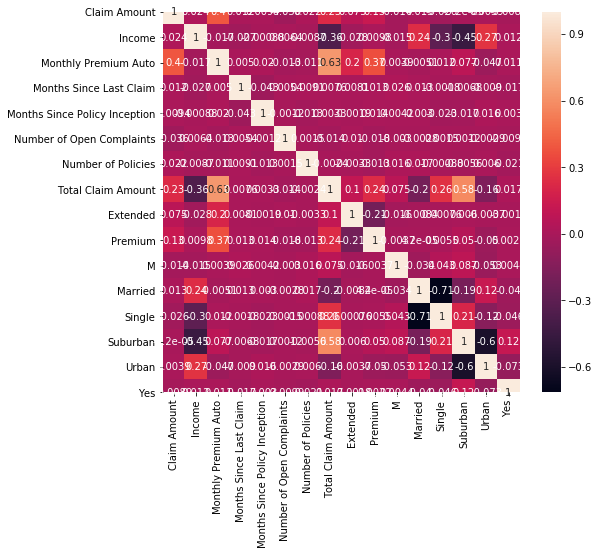

In [24]:
#lets check the correlation of the columns by heatmap
plt.figure(figsize=(8,7))
sns.heatmap(df.corr(),annot=True)
plt.show()
#after checking we can see that 1 value is completely diagonal 
#so the heatmap shows columns are completely correlated with each other.

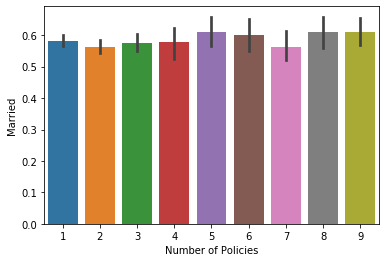

In [25]:
#Lets check how many people have the number of policies
sns.barplot(x='Number of Policies',y='Married',data=df)
plt.show()

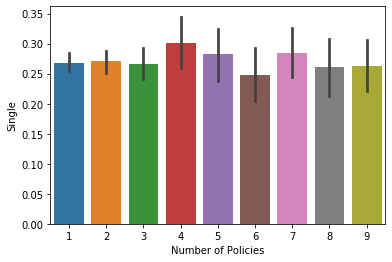

In [26]:
#Lets check how many people have the number of policies
sns.barplot(x='Number of Policies',y='Single',data=df)
plt.show()

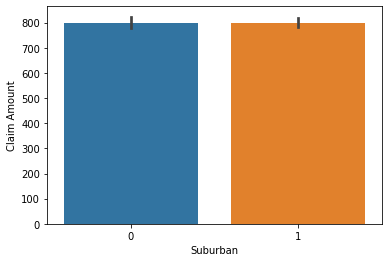

In [27]:
#Lets check claim amount with respect to suburbon
sns.barplot(x='Suburban',y='Claim Amount',data=df)
plt.show()

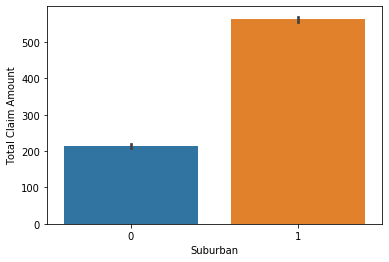

In [28]:
#Lets check Total claim amount with respect to suburbon
sns.barplot(x='Suburban',y='Total Claim Amount',data=df)
plt.show()

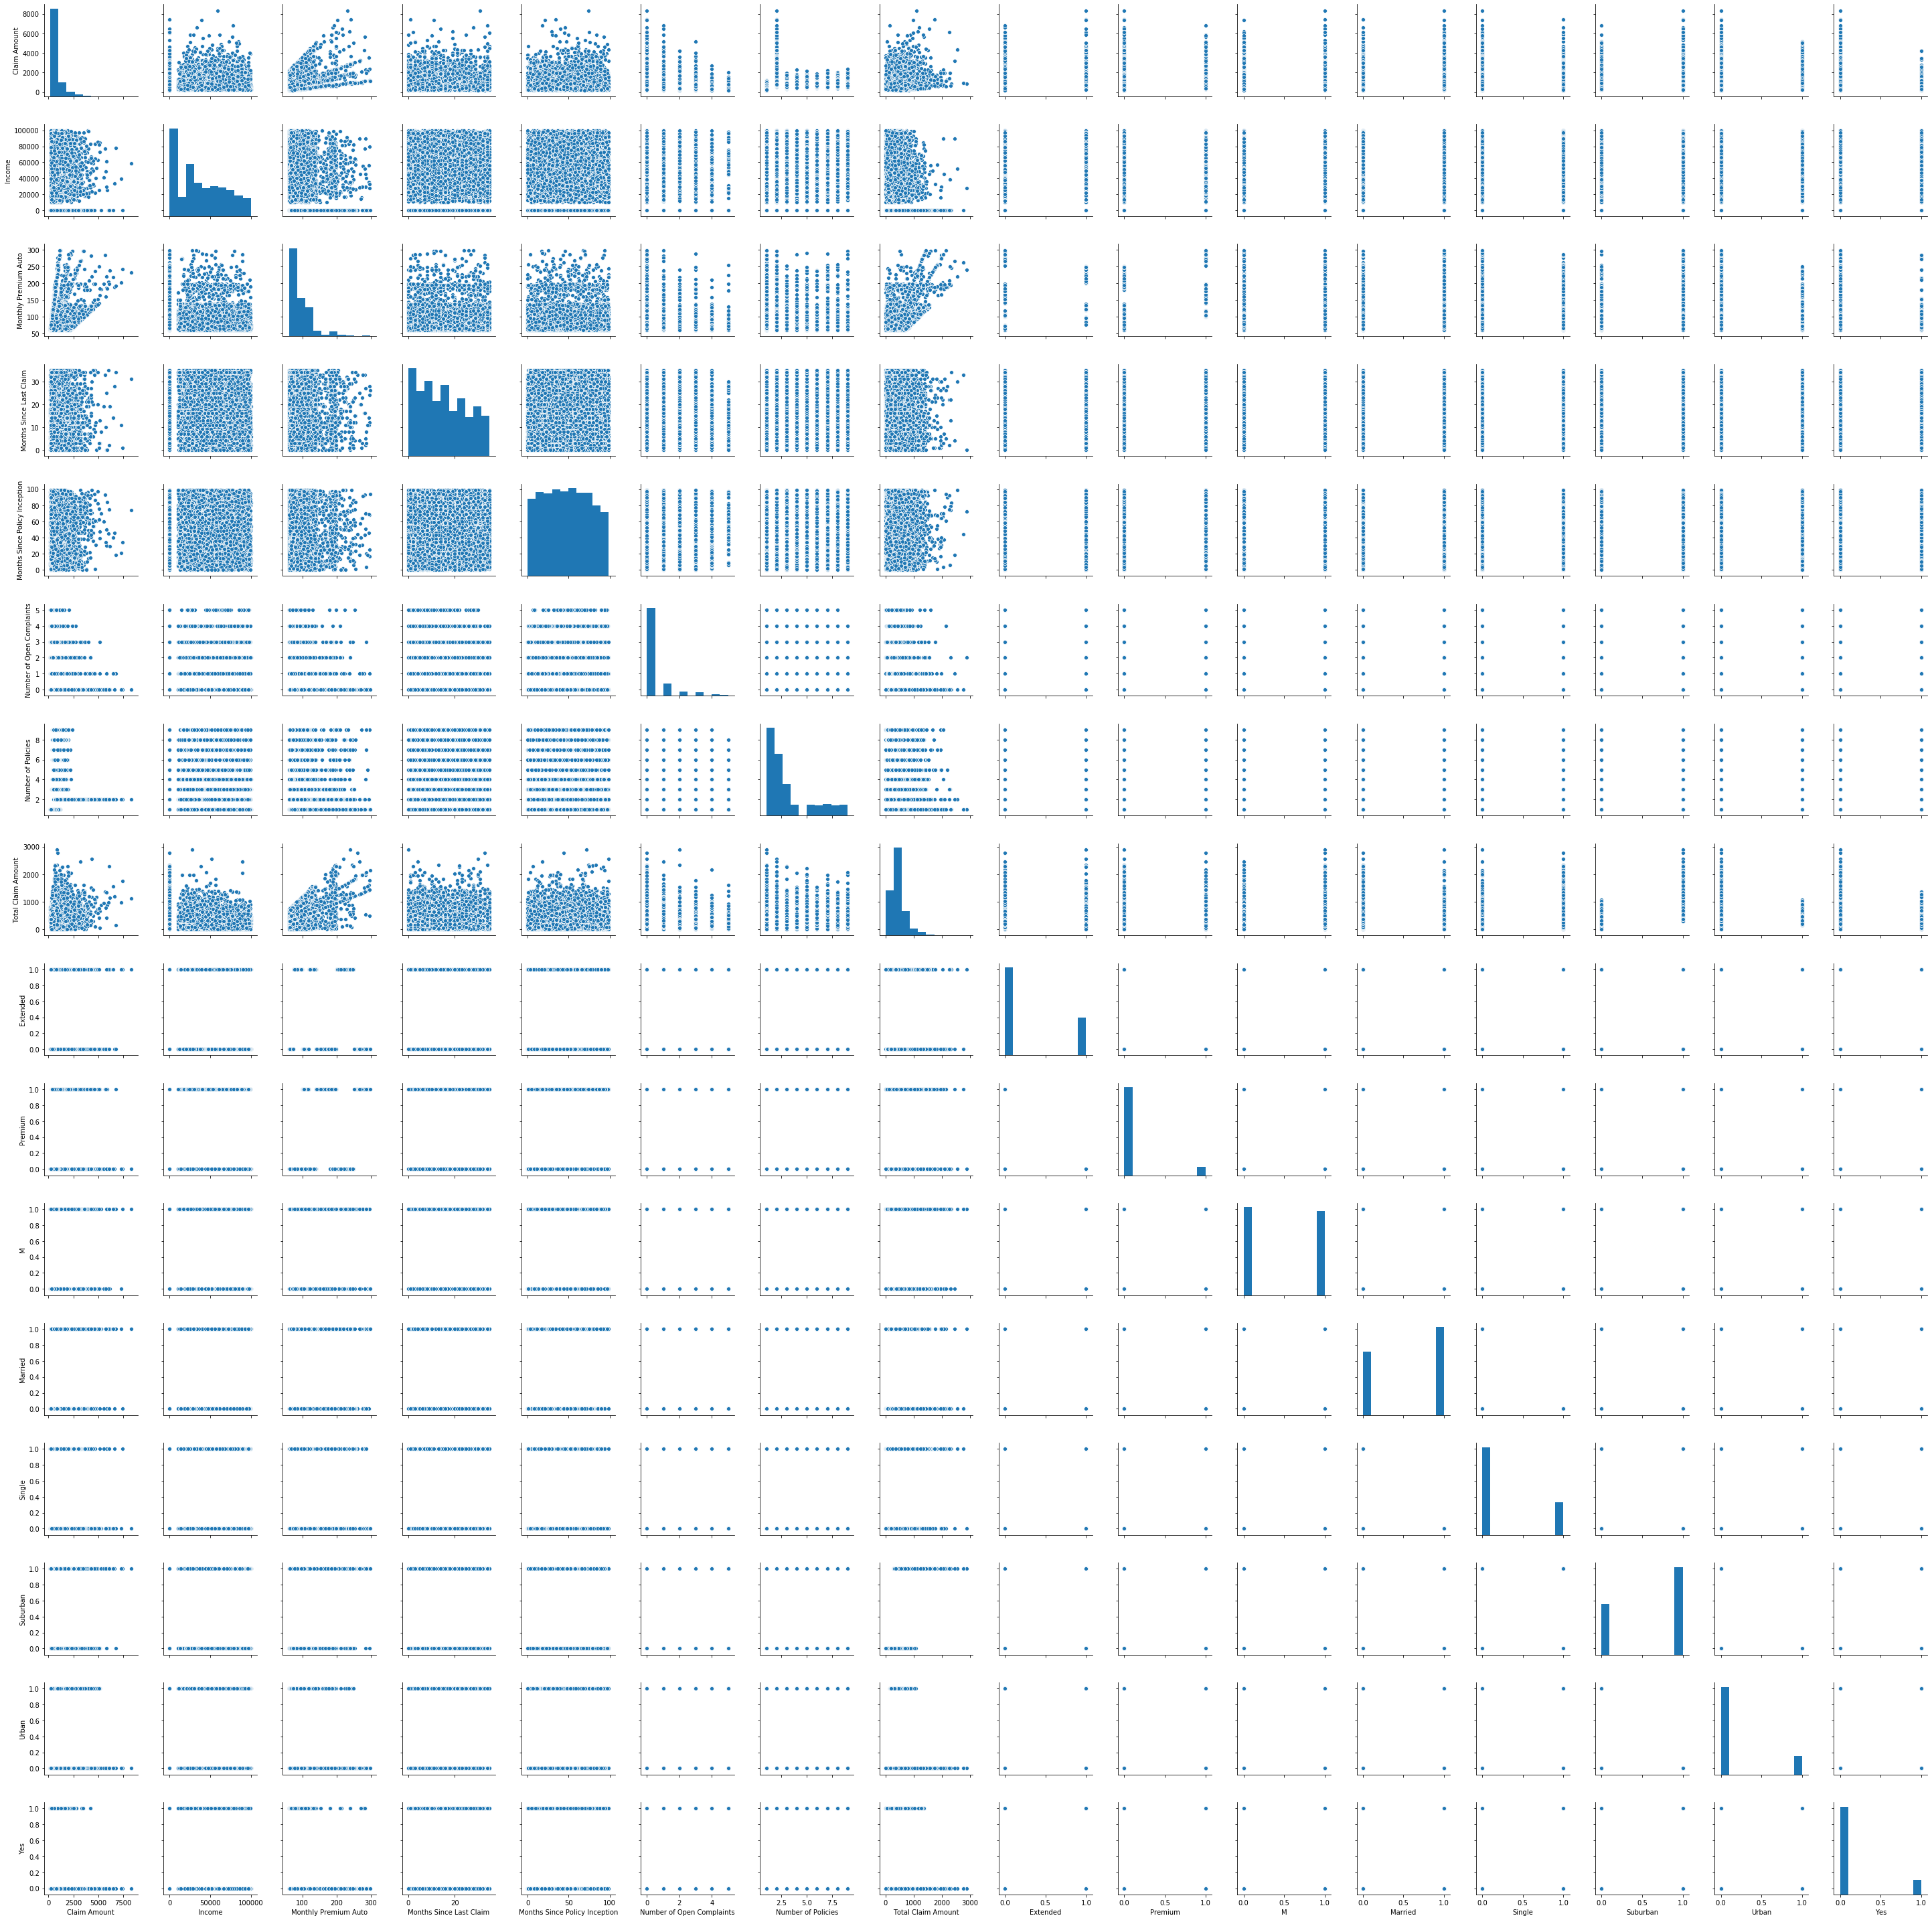

In [29]:
#lets check the regression parameters by pairplot
sns.pairplot(df)
plt.show()
#as per the plots and diagram shown in a graphical representation we can see this is a clear problem of linear regression
#so we will go ahead for the prediction with linear regression model

In [30]:
#lets check the skewness of the data
df.skew()

Claim Amount                     3.032280
Income                           0.286887
Monthly Premium Auto             2.123546
Months Since Last Claim          0.278586
Months Since Policy Inception    0.040165
Number of Open Complaints        2.783263
Number of Policies               1.253333
Total Claim Amount               1.714966
Extended                         0.871991
Premium                          2.861258
M                                0.039866
Married                         -0.324357
Single                           1.035788
Suburban                        -0.550594
Urban                            1.727474
Yes                              2.037567
dtype: float64

In [31]:
#change the values in each columns by replacing log1 values
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [32]:
#lets check the skewness of the data
df.skew()
#here we can see that after checking out the skewness still some values are more so will scaled all the values at one node 
#by standard scaling

Claim Amount                     0.578248
Income                           0.286887
Monthly Premium Auto             1.013663
Months Since Last Claim          0.278586
Months Since Policy Inception    0.040165
Number of Open Complaints        1.999011
Number of Policies               0.657633
Total Claim Amount              -1.741369
Extended                         0.871991
Premium                          2.861258
M                                0.039866
Married                         -0.324357
Single                           1.035788
Suburban                        -0.550594
Urban                            1.727474
Yes                              2.037567
dtype: float64

In [33]:
#now we will check for the Outliers and remove it for a better results
from scipy.stats import zscore
z_score = abs(zscore(df))
print(df.shape)
df_final = df.loc[(z_score<3).all(axis=1)]
print(df_final.shape)

(9134, 16)
(7876, 16)


In [34]:
#lets separate x and y
df_x = df_final.drop(columns=["Total Claim Amount"],axis=1)
y = df_final[["Total Claim Amount"]]

In [35]:
#lets do Standar Scaling to scaled a data 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(df_x)
x = pd.DataFrame(x, columns=df_x.columns)

In [36]:
#lets split the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.3)

In [37]:
print(x_train.shape,x_test.shape)

(5513, 15) (2363, 15)


In [39]:
#lets create a function to call 

def maxr2_score(regr,df_x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr = r2_score(y_test,y_pred)
        print("r2 score corresponding to",r_state,"is",r2_scr)
        if r2_scr > max_r_score:
            max_r_score = r2_scr
            final_r_state = r_state
    print("max r2 corrosponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [40]:
#lets apply first algorithm
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
r_state=maxr2_score(lreg,x,y)

r2 score corresponding to 42 is 0.8169495982643515
r2 score corresponding to 43 is 0.8210717120691162
r2 score corresponding to 44 is 0.8318053788689111
r2 score corresponding to 45 is 0.8168851395051622
r2 score corresponding to 46 is 0.8190247136735946
r2 score corresponding to 47 is 0.8301081604755689
r2 score corresponding to 48 is 0.8247834079477405
r2 score corresponding to 49 is 0.8315289486051858
r2 score corresponding to 50 is 0.8036082286819043
r2 score corresponding to 51 is 0.8237003055706098
r2 score corresponding to 52 is 0.82648757348369
r2 score corresponding to 53 is 0.8336184650954626
r2 score corresponding to 54 is 0.8287729379304202
r2 score corresponding to 55 is 0.8200618666375813
r2 score corresponding to 56 is 0.8198101305234891
r2 score corresponding to 57 is 0.8293416310734497
r2 score corresponding to 58 is 0.8246562415207465
r2 score corresponding to 59 is 0.8271806393413261
r2 score corresponding to 60 is 0.8284014873116957
r2 score corresponding to 61 is 0

In [41]:
#Here it shows a nice max r score lets explore more and check 

In [42]:
#lets go for the next model and find out the best parameter
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors = {"n_neighbors":range(1,30)}
knr = KNeighborsRegressor()
gknr = GridSearchCV(knr, neighbors , cv=10)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 6}

In [43]:
#lets apply and get the r2 score
knr = KNeighborsRegressor(n_neighbors=6)
r_state=maxr2_score(knr,x,y)

r2 score corresponding to 42 is 0.7811947902873446
r2 score corresponding to 43 is 0.7988954098126305
r2 score corresponding to 44 is 0.8047682961396488
r2 score corresponding to 45 is 0.7968311317069818
r2 score corresponding to 46 is 0.7887856344236795
r2 score corresponding to 47 is 0.7864154842486455
r2 score corresponding to 48 is 0.788302967557251
r2 score corresponding to 49 is 0.7913016088681417
r2 score corresponding to 50 is 0.7678336823797111
r2 score corresponding to 51 is 0.7946589301476258
r2 score corresponding to 52 is 0.7917842799136836
r2 score corresponding to 53 is 0.8026268149615675
r2 score corresponding to 54 is 0.8018926279421781
r2 score corresponding to 55 is 0.7905981034266574
r2 score corresponding to 56 is 0.7994904705994657
r2 score corresponding to 57 is 0.7837609108779873
r2 score corresponding to 58 is 0.8003849259112916
r2 score corresponding to 59 is 0.7999925460532508
r2 score corresponding to 60 is 0.7997284374409643
r2 score corresponding to 61 is 

In [44]:
#lets check mean r2 score of both of linear regression model and knn regression
from sklearn.model_selection import cross_val_score
print("mean r2 score of linear regression is ",cross_val_score(lreg,x,y,cv=5,scoring="r2").mean())
print("mean standard deviation in r2 score of linear regression is ",cross_val_score(lreg,x,y,cv=5,scoring="r2").std())
print()
print("mean r2 score of knn regression is ",cross_val_score(knr,x,y,cv=5,scoring="r2").mean())
print("mean standard deviation in r2 score of knn regression is ",cross_val_score(knr,x,y,cv=5,scoring="r2").std())

mean r2 score of linear regression is  0.8210537777744777
mean standard deviation in r2 score of linear regression is  0.009679208945226302

mean r2 score of knn regression is  0.7903871304957815
mean standard deviation in r2 score of knn regression is  0.010680218125457375


In [45]:
#lets check laso regression 
from sklearn.linear_model import Lasso
lsreg = Lasso()
parameters = {"alpha":[0.001,0.01,1]}
clf = GridSearchCV(lsreg,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.001}

In [46]:
lsreg = Lasso(alpha=0.001)
r_state=maxr2_score(lsreg,x,y)

r2 score corresponding to 42 is 0.817024443617427
r2 score corresponding to 43 is 0.8213399712990892
r2 score corresponding to 44 is 0.831927705869809
r2 score corresponding to 45 is 0.8169633409086419
r2 score corresponding to 46 is 0.8192726086715363
r2 score corresponding to 47 is 0.8300167177638074
r2 score corresponding to 48 is 0.824610827115313
r2 score corresponding to 49 is 0.8315077890475229
r2 score corresponding to 50 is 0.8039595920677344
r2 score corresponding to 51 is 0.8238327228416389
r2 score corresponding to 52 is 0.8265618426218085
r2 score corresponding to 53 is 0.8334235772202845
r2 score corresponding to 54 is 0.8287997886920176
r2 score corresponding to 55 is 0.8201875443726632
r2 score corresponding to 56 is 0.8198861732189598
r2 score corresponding to 57 is 0.829240731691993
r2 score corresponding to 58 is 0.8246025923202746
r2 score corresponding to 59 is 0.8271514430343085
r2 score corresponding to 60 is 0.8284166346196555
r2 score corresponding to 61 is 0.8

In [47]:
print("mean r2 score of Lasso regression is ",cross_val_score(lsreg,x,y,cv=5,scoring="r2").mean())
print("mean standard deviation in r2 score of Lasso regression is ",cross_val_score(lsreg,x,y,cv=5,scoring="r2").std())
print()

mean r2 score of Lasso regression is  0.8211366682407606
mean standard deviation in r2 score of Lasso regression is  0.00963071519607288



In [48]:
#now we will try to use gradiant boosting techniques
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
parameters = {"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
clf = GridSearchCV(gbr,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

In [49]:
gbr = GradientBoostingRegressor(learning_rate=0.1,n_estimators=100)
print("mean r2 score of gb regression is ",cross_val_score(gbr,x,y,cv=5,scoring="r2").mean())
print("mean standard deviation in r2 score of gb regression is ",cross_val_score(gbr,x,y,cv=5,scoring="r2").std())
print()

mean r2 score of gb regression is  0.8302132727258016
mean standard deviation in r2 score of gb regression is  0.009375998079413896



In [50]:
#after applying these algorithms i came to know that Lasso model is a good one 
#So i will go ahead with Lasso model

from sklearn.externals import joblib


In [51]:
joblib.dump(lsreg, 'mpg_Model.pkl')

['mpg_Model.pkl']